3. Build the Image classification model by dividing the model into following 4 stages:
<br>
a. Loading and preprocessing the image data
<br>
b. Defining the model’s architecture
<br>
c. Training the model
<br>
d. Estimating the model’s performance

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#### a. Loading and preprocessing the image data

In [4]:
train_data_dir = 'Downloads/mnist-jpg/mnist-jpg/train'
test_data_dir = 'Downloads/mnist-jpg/mnist-jpg/test'

# Image data generator for training data
train_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Image data generator for testing data
test_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Create data generators
train_batch_size = 10000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=train_batch_size,
    class_mode='categorical', 
    color_mode='grayscale',# Use 'categorical' for one-hot encoded labels
    shuffle=True,
)

# Load test data without labels (class_mode=None)
test_batch_size = 2000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=test_batch_size,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
    color_mode='grayscale',
    shuffle=True,
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


#### Selecting first batch containing 10000 images

In [6]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [7]:
print(x_train.shape, y_train.shape)

(10000, 28, 28, 1) (10000, 10)


#### b. Defining the model’s architecture

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\Komal Mahajan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### c. Training the model

In [11]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7444 - loss: 0.9191 - val_accuracy: 0.9095 - val_loss: 0.2809
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9327 - loss: 0.2336 - val_accuracy: 0.9430 - val_loss: 0.1841
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9625 - loss: 0.1335 - val_accuracy: 0.9515 - val_loss: 0.1500
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9741 - loss: 0.0946 - val_accuracy: 0.9620 - val_loss: 0.1227
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9802 - loss: 0.0769 - val_accuracy: 0.9610 - val_loss: 0.1325


#### d. Estimating the model’s performance

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9594 - loss: 0.1357
Loss:  0.13249598443508148
Accuracy:  0.9610000252723694


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Actual Number:  3
Predicted Number:  3


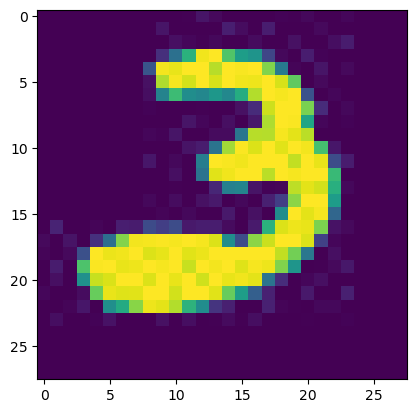

In [27]:
n = 10 
plt.imshow(x_test[n])
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))